In [1]:
%pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 34.7 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633957 sha256=5eba0e3dcce544cb42a305559ceb3bcf7d52681215f062c677faef8ebf8aef8c
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [3]:
import pandas as pd
import numpy as np
from surprise import SVD
import numpy as np
import surprise
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise import KNNBasic
from matplotlib import pyplot as plt

In [4]:
read = Reader(line_format='user item rating timestamp',sep=',',skip_lines=1, rating_scale=(1, 5))
ratings_data = Dataset.load_from_file("/content/ratings_small.csv",read)

In [18]:
user_based_rmse = []
user_based_mae = []
measures = ['RMSE', 'MAE']

for i in range(1,100):
    knn_user_based = KNNBasic(sim_options={'user_based': True}, k=i)

    print('\n\n'+('='*10)+' K = ' + str(i)+' '+('='*10))
    cv_user_based = cross_validate(knn_user_based, ratings_data, measures, verbose=True, cv=5)
    start_mean = cv_user_based['test_rmse'].mean()

    user_based_rmse.append(cv_user_based['test_rmse'].mean())
    user_based_mae.append(cv_user_based['test_mae'].mean())




========== K = 1 ==========
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2219  1.2070  1.2112  1.2148  1.2129  1.2136  0.0049  
MAE (testset)     0.9106  0.9019  0.9086  0.9003  0.9040  0.9051  0.0039  
Fit time          0.12    0.12    0.14    0.10    0.12    0.12    0.01    
Test time         0.95    0.72    0.75    0.82    0.75    0.80    0.08    


========== K = 2 ==========
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity mat

In [45]:
item_based_rmse = []
item_based_mae = []
measures = ['RMSE', 'MAE']

for i in range(1,100):
    print('\n\n'+('='*10)+' K = ' + str(i)+' '+('='*10))
    knn_item_based = KNNBasic(sim_options={'user_based': False}, k=i)
    cv_item_based = cross_validate(knn_item_based, ratings_data, measures, verbose=True, cv=5)

    item_based_rmse.append(cv_item_based['test_rmse'].mean())
    item_based_mae.append(cv_item_based['test_mae'].mean())
    



========== K = 1 ==========
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3119  1.3005  1.2874  1.3060  1.3177  1.3047  0.0104  
MAE (testset)     0.9706  0.9681  0.9567  0.9705  0.9785  0.9689  0.0070  
Fit time          7.29    2.89    3.41    3.32    2.78    3.94    1.69    
Test time         4.04    3.97    4.09    4.00    4.17    4.05    0.07    


========== K = 2 ==========
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity mat

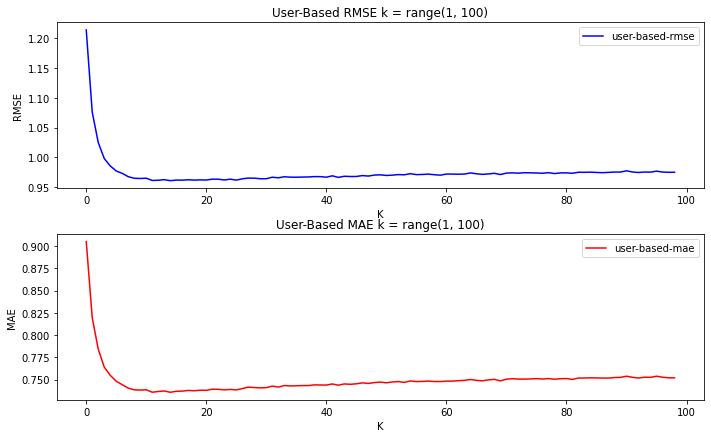

In [46]:
plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()
plt.subplot(2, 1, 1)
fig.tight_layout()
plt.plot(user_based_rmse, label='user-based-rmse', color='blue')
plt.title("User-Based RMSE k = range(1, 100)")
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()

plt.subplot(2, 1, 2)
fig.tight_layout()
plt.plot(user_based_mae, label='user-based-mae', color='red')
plt.title("User-Based MAE k = range(1, 100)")
plt.xlabel("K")
plt.ylabel("MAE")
plt.legend()

plt.show()

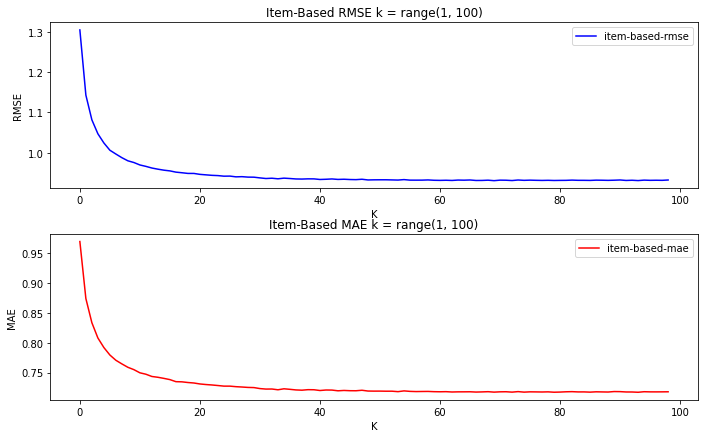

In [47]:
plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()
plt.subplot(2, 1, 1)
fig.tight_layout()
plt.plot(item_based_rmse, label='item-based-rmse', color='blue')
plt.title("Item-Based RMSE k = range(1, 100)")
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()

plt.subplot(2, 1, 2)
fig.tight_layout()
plt.plot(item_based_mae, label='item-based-mae', color='red')
plt.title("Item-Based MAE k = range(1, 100)")
plt.xlabel("K")
plt.ylabel("MAE")
plt.legend()

plt.show()

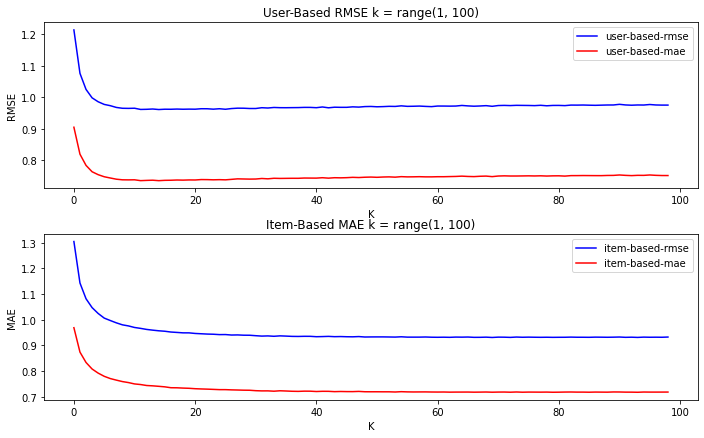

In [48]:
plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()
plt.subplot(2, 1, 1)
fig.tight_layout()
plt.plot(user_based_rmse, label='user-based-rmse', color='blue')
plt.plot(user_based_mae, label='user-based-mae', color='red')
plt.title("User-Based RMSE k = range(1, 100)")
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()

plt.subplot(2, 1, 2)
fig.tight_layout()
plt.plot(item_based_rmse, label='item-based-rmse', color='blue')
plt.plot(item_based_mae, label='item-based-mae', color='red')
plt.title("Item-Based MAE k = range(1, 100)")
plt.xlabel("K")
plt.ylabel("MAE")
plt.legend()

plt.show()